# Generate rate capability plots

In this notebook we use PyBaMM to generate rate capability plots and Ragone plots. Rate capability plots show discharge capacity at different C-rates. Similarly, multiplying the discharge current and capacity by the average discharge voltage we can obtain Ragon plots (that is energy vs power).

First we need to import pybamm and the other necessary packages.

In [1]:
%pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
import pybamm
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In this example we use the SPMe model with the default settings, but we could change it to other models, parameters, geometries... For example, you generate rate capability plots using the DFN model in [this script](https://github.com/pybamm-team/PyBaMM/blob/develop/examples/scripts/rate_capability.py). 

In [2]:
model = pybamm.lithium_ion.SPMe()

We now cycle a loop of different C-rates and run full discharge simulations for each C-rate. For each simulation we register the final discharge capacity, the applied current and the average discharge voltage. We can then generate the rate capability and the Ragone plots.

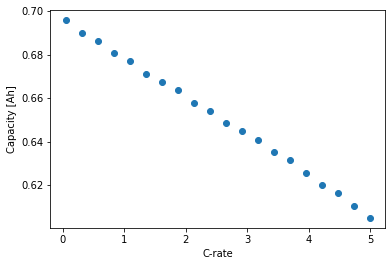

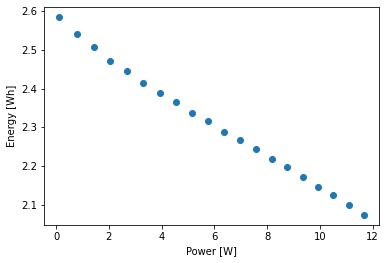

In [3]:
C_rates = np.linspace(0.05, 5, 20)
capacities = np.zeros_like(C_rates)
currents = np.zeros_like(C_rates)
voltage_av = np.zeros_like(C_rates)

for i, C_rate in enumerate(C_rates):
    experiment = pybamm.Experiment(
        [f"Discharge at {C_rate:.4f}C until 3.2V"],
        period=f"{10 / C_rate:.4f} seconds"
    )
    sim = pybamm.Simulation(
        model,
        experiment=experiment,
        solver=pybamm.CasadiSolver(dt_max=120)
    )
    sim.solve()

    time = sim.solution["Time [s]"].entries
    capacity = sim.solution["Discharge capacity [A.h]"]
    current = sim.solution["Current [A]"]
    voltage = sim.solution["Voltage [V]"]

    capacities[i] = capacity(time[-1])
    currents[i] = current(time[-1])
    voltage_av[i] = np.mean(voltage(time))

plt.figure(1)
plt.scatter(C_rates, capacities)
plt.xlabel('C-rate')
plt.ylabel('Capacity [Ah]')

plt.figure(2)
plt.scatter(currents * voltage_av, capacities * voltage_av)
plt.xlabel('Power [W]')
plt.ylabel('Energy [Wh]')

plt.show()

## References

The relevant papers for this notebook are:

In [4]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[3] Scott G. Marquis, Valentin Sulzer, Robert Timms, Colin P. Please, and S. Jon Chapman. An asymptotic derivation of a single particle model with electrolyte. Journal of The Electrochemical Society, 166(15):A3693–A3706, 2019. doi:10.1149/2.0341915jes.
[4] Valentin Sulzer, Scott G. Marquis, Robert Timms, Martin Robinson, and S. Jon Chapman. Python Battery Mathematical Modelling (PyBaMM). ECSarXiv. February, 2020. doi:10.1149/osf.io/67ckj.

